# 4. 표본과 평균

### 4-1. 시행

* 시행 : 조사를 1회 한 것  
* 시행횟수 : 같은 조건으로 시행을 반복한 횟수

In [1]:
# 필요한 패키지, 모듈 불러오기
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 시각화 패키지 불러오기
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 소수점 지정
%precision 3
# 시각화 바로보기
%matplotlib inline

In [2]:
# 평균이 1.62, 표준편차가 0.2(분산 0.04)인 정규분포
population = stats.norm(loc = 1.62, scale = 0.2)

### 표본 평균을 여러번 계산하기

In [3]:
# 시행횟수를 10,000회(표본평균을10,000개 얻기 위해서 일단 0을 10,000개 생성)
sample_mean_array = np.zeros(10000)

In [4]:
sample_mean_array

array([0., 0., 0., ..., 0., 0., 0.])

In [5]:
len(sample_mean_array)

10000

In [6]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10) # 평균이 1.62, 표준편차가 0.2(분산 0.04), 표본수가 10인 정규분포를 생성.
    sample_mean_array[i] = np.mean(sample) # 정규분포의 평균을 계산해서 0번 부터 10,000번까지 array를 생성

In [7]:
# 10,000개의 (표본)평균들의 리스트
sample_mean_array

array([1.601, 1.586, 1.637, ..., 1.654, 1.764, 1.645])

### 표본평균의 평균값은 모평균에 가깝다

In [8]:
# 표본 평균의 평균값
np.mean(sample_mean_array)

1.6210506056979368

In [9]:
# 표본 평균의 표준 편차
np.std(sample_mean_array, ddof = 1)

0.06283952127151005

<AxesSubplot: ylabel='Count'>

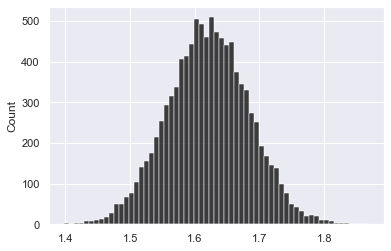

In [10]:
# 표본 평균의 표준 편차
sns.histplot(sample_mean_array, color = 'black')

In [11]:
# 샘플 사이즈를 10~100100까지의 범위에서 100 단락으로 변화시킨다
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [12]:
# 표본 평균을 샘플 사이즈 개수만큼 0을 생성
sample_mean_array_size = np.zeros(len(size_array))

In [13]:
# "표본 평균 구하기" 시도를 샘플 크기를 변경하면서 여러 번 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample mean')

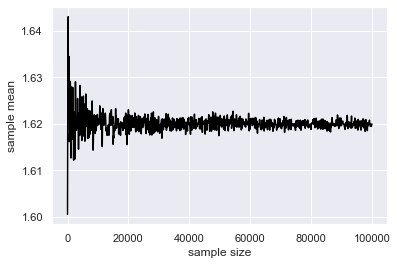

In [14]:
plt.plot(size_array, sample_mean_array_size, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

### 샘플 평균을 여러 번 계산하는 함수 만들기

In [15]:
# 샘플 평균을 여러 번 계산하는 함수
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = np.mean(sample)
        
    return(sample_mean_array)

In [16]:
# 데이터를 10개 선택하여 평균값 구하기'시행을 10000회 반복한 결과를 더 평균한다
np.random.seed(1)
np.mean(calc_sample_mean(size = 10, n_trial = 10000))

1.6210506056979368

### 샘플 크기를 변경할 때의 샘플 평균 분포

In [17]:
np.random.seed(1)
# 샘플 크기 10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})
# 샘플 크기 20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})
# 샘플 크기 30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})

# 이어 붙이기
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

# 결과 표시
print(sim_result.head())

   sample_mean     size
0     1.600572  size 10
1     1.586082  size 10
2     1.637383  size 10
3     1.584285  size 10
4     1.666164  size 10


<AxesSubplot: xlabel='size', ylabel='sample_mean'>

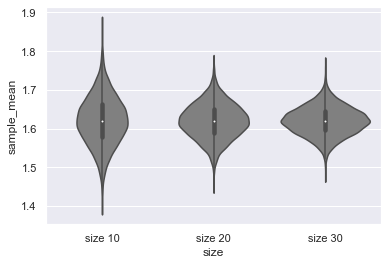

In [18]:
sns.violinplot(x = "size", y = "sample_mean", 
               data = sim_result, color = 'gray')

### 표본 평균의 표준 편차는 모 표준 편차보다 작습니다.

In [19]:
# 샘플 사이즈를 2~100까지의 범위에서 2씩 변화시킨다

size_array =  np.arange(
    start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [20]:
# "표본 평균의 표준 편차"를 저장하는 0 배열 만들기
sample_mean_std_array = np.zeros(len(size_array))

In [21]:
# 표본 평균의 표준 편차를 계산하는 시도를 샘플 크기를 변경하면서 여러 번 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size =size_array[i], 
                                   n_trial = 100)
    sample_mean_std_array[i] = np.std(sample_mean, 
                                      ddof = 1)

Text(0, 0.5, 'mean_std value')

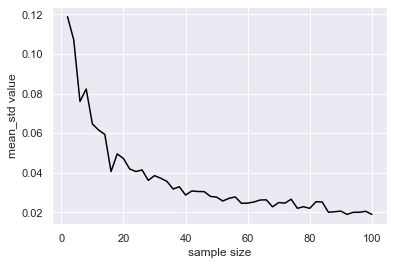

In [22]:
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 표준 오차

In [23]:
# 표본 평균의 이론적 값: 표준 오차
standard_error = 0.2 / np.sqrt(size_array)
standard_error

array([0.141, 0.1  , 0.082, 0.071, 0.063, 0.058, 0.053, 0.05 , 0.047,
       0.045, 0.043, 0.041, 0.039, 0.038, 0.037, 0.035, 0.034, 0.033,
       0.032, 0.032, 0.031, 0.03 , 0.029, 0.029, 0.028, 0.028, 0.027,
       0.027, 0.026, 0.026, 0.025, 0.025, 0.025, 0.024, 0.024, 0.024,
       0.023, 0.023, 0.023, 0.022, 0.022, 0.022, 0.022, 0.021, 0.021,
       0.021, 0.021, 0.02 , 0.02 , 0.02 ])

Text(0, 0.5, 'mean_std value')

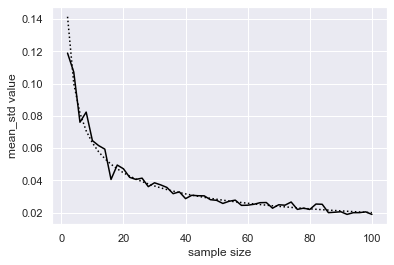

In [24]:
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.plot(size_array, standard_error, 
         color = 'black', linestyle = 'dotted')

plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 표본 분산의 평균값은 모 분산에서 벗어난다

In [25]:
# 표본 분산을 저장하는 넣기
sample_var_array = np.zeros(10000)

In [26]:
# "데이터 10개를 선택하여 표본 분산 구하기" 시도를 10000회 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = np.var(sample, ddof = 0)

In [27]:
# 표본 분산의 평균값
np.mean(sample_var_array)

0.03591804298332563

### 불편 분산을 사용하면 바이어스(편향)가 사라진다

In [28]:
# "불편 분산"을 저장하는 0 배열 10000개 만들기
unbias_var_array = np.zeros(10000)

# 데이터를 10개 선택해 불편 분산을 구한다」시행을 10000회 반복

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = np.var(sample, ddof = 1)

    #  불편 분산의 평균값
np.mean(unbias_var_array)

0.03990893664813959

### 샘플 크기를 늘리면 불편 분산이 모 분산에 가까워집니다.

In [29]:
# 샘플 사이즈를 10~100100까지의 범위에서 100 간격 으로 변화시킨다
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [30]:
# "불편 분산"을 0 배열 만들기 
unbias_var_array_size = np.zeros(len(size_array))

In [31]:
# 샘플 사이즈를 바꾸면서 "불편 분산을 구한다"
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] =  np.var(sample, ddof = 1)

Text(0, 0.5, 'unbias var')

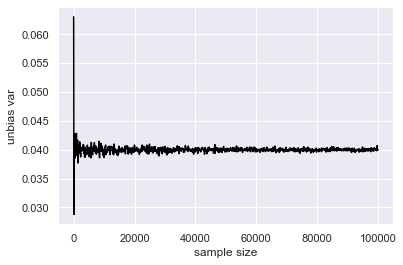

In [32]:
plt.plot(size_array, unbias_var_array_size, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 중심극한정리

확률론과 통계학에서 중심 극한 정리(中心 極限 定理, 영어: central limit theorem, 약자 CLT)는 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리이다.

<AxesSubplot: ylabel='Count'>

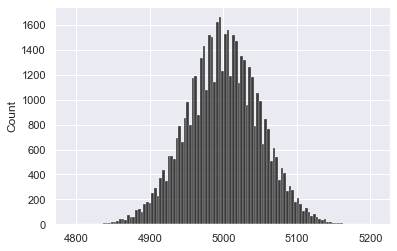

In [33]:
# 샘플 크기 및 시도 횟수
n_size  = 10000
n_trial = 50000

# 표면 1, 뒷면 0
coin = np.array([0,1])

# 코인을 던진 횟수
count_coin = np.zeros(n_trial)

# 동전을 n_size회 던지는 시도를 n_trial회 실시
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(
        np.random.choice(coin, size = n_size, 
                         replace = True))
# 히스토그램
sns.histplot(count_coin, color = 'black')